## Import delle librerie

In [239]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Estrazione dati dal Dataset e creazione DataFrame

In [240]:
covidDF = pd.read_csv("./dataset/owid-covid-data.csv", encoding='unicode_escape')
covidDF["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

# Analisi Covid-19

#### **1)** Verificare le `dimensioni` del dataset e i relativi `metadati`

In [241]:
print(covidDF.shape)
print(list(covidDF.columns))

(387253, 67)
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hund

## Check and Clean Data

In [242]:
covidDF["date"] = pd.to_datetime(covidDF["date"])
covidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387253 entries, 0 to 387252
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    387253 non-null  object        
 1   continent                                   368726 non-null  object        
 2   location                                    387253 non-null  object        
 3   date                                        387253 non-null  datetime64[ns]
 4   total_cases                                 348333 non-null  float64       
 5   new_cases                                   376280 non-null  float64       
 6   new_cases_smoothed                          375050 non-null  float64       
 7   total_deaths                                326109 non-null  float64       
 8   new_deaths                                  376589 non-null  float64      

In [245]:
covidDF.loc[covidDF.location == "World", "continent"] = covidDF.loc[covidDF.location == "World", "continent"].fillna(covidDF.loc[covidDF.location == "World","location"])

totals = ["total_deaths","total_cases","icu_patients"]
 
for column in covidDF.columns:
    ctype = covidDF[column].dtype
    #if ctype=="float64":
     #   covidDF[column] = covidDF[column].fillna(0)
    if column=="continent":
        covidDF[column] = covidDF[column].fillna("NA")
    #if  column in totals:
     #   covidDF[column] = covidDF[column].fillna(method='ffill')
     
     
na = covidDF[(covidDF.continent == "NA")]

notNa = covidDF[~(covidDF.continent == "NA")]
notNa_world = notNa[~(notNa.continent == "World")]

naLocation = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania','South America']

for location in naLocation:
    covidDF.loc[[(covidDF.continent == "NA")&(covidDF.location == location)], "continent"] #= covidDF.loc[[(covidDF.continent == "NA")&(covidDF.location == location)],"location"]

continents = notNa_world["continent"].unique()
for continent in continents:
    continentDf = notNa_world[notNa_world.continent == continent]
    for column in continentDf.columns:
        if  column in totals:
            continentDf[column] = continentDf[column].fillna(method='ffill')




        

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [index]"

In [ ]:
covidDF[covidDF.continent == "NA"]["location"].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'Low income', 'Lower middle income', 'North America', 'Oceania',
       'South America', 'Upper middle income'], dtype=object)

In [ ]:
na = covidDF[(covidDF.continent == "World")]
na["total_cases"].max()


774954379.0

#### **2.A)** Per `ogni continente` di trovare `il numero di casi totali` avvenuti in quello stesso continente 
#### **2.B)** Si chiede di non considerare eventuali `locazioni` che nel dataset `non appartengono ad alcun continente`

Text(0, 0.5, 'Casi totali')

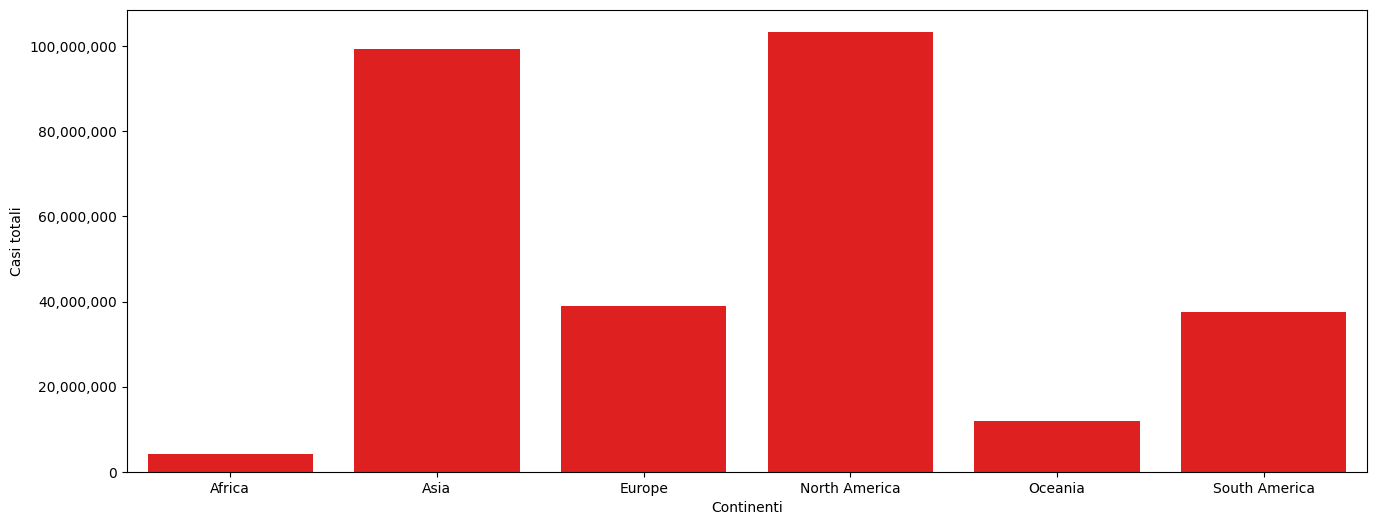

In [ ]:
total_casesS = notNa_world.groupby("continent")["total_cases"].max()
plt.figure(figsize=(16,6))

barplot =sns.barplot(total_casesS, color='red')

# Get the current axes (ax) from the barplot
ax = barplot.axes

# Format the tick labels on the y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

barplot.set_xlabel("Continenti")

# Set the label for the y-axis
barplot.set_ylabel("Casi totali")


In [ ]:
notNa[notNa.continent == "World"].groupby("continent")["total_cases"].max()

continent
World    774954379.0
Name: total_cases, dtype: float64

#### **3)** Date `due variabili` contenenti i nomi di `continenti`, ne confronti i seguenti relativi descrittori statistici: `valore massimo, media, e percentuale rispetto` al numero dei `casi totali nel mondo` (calcolati anche sulle locazioni senza indicazione di continente);

In [ ]:
continent1 = "Europe"
continent2 = "North America"
world = "World"
cases = ["Europe","North America","World"]

mask = ((notNa.continent == continent1)|(notNa.continent == continent2)|(notNa.continent == world))&~(notNa.new_cases == 0)

notNa[mask].groupby("continent")["new_cases"].agg(["sum","mean",lambda x: (round(x.sum() / notNa[notNa.continent == "World"]["total_cases"].max() * 100,0))])


    

,sum,mean,<lambda_0>
continent,,,
Europe,252376812.0,2.659117e+04,33.0
North America,124530643.0,2.085940e+04,16.0
World,775022566.0,3.522830e+06,100.0


#### **4.A)** Selezionare i dati relativi all'`Italia nel 2022`, mostrare con un `grafico` l'evoluzione del `casi totali` rispetto alla `data`.
#### **4.B)** Mostrare con un `grafico` il numero di `nuovi casi` rispetto alla `data` (filtrare i dati se necessario).
#### **4.C)** Mostrare infine un `grafico` che mostra l'andamento della `somma cumulativa nuovi casi` del 2022, commentare se ci sono similarità con l'andamento del numero dei `casi totali`;

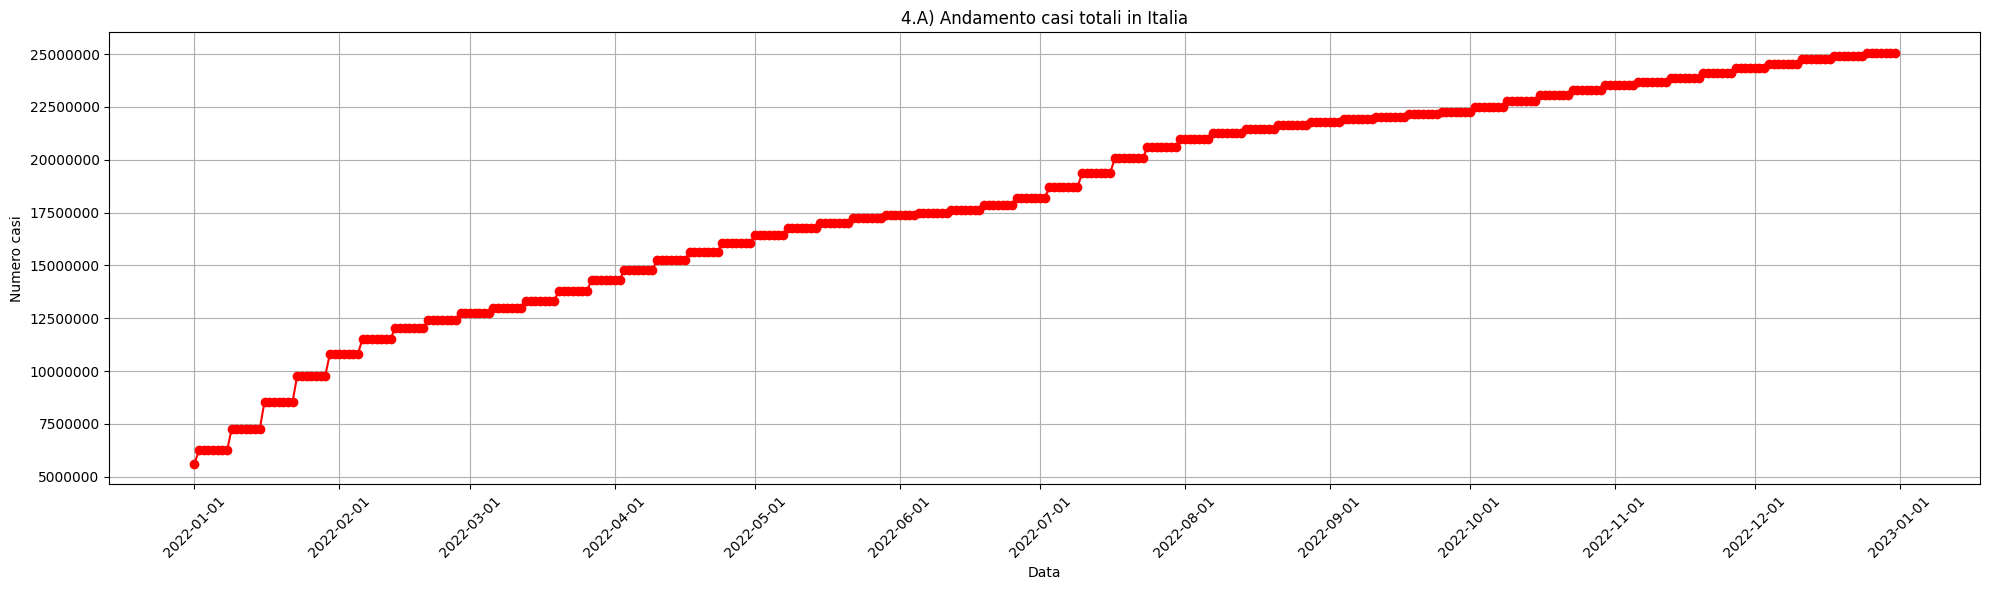

In [ ]:
italy = covidDF[covidDF.location == "Italy"]
italy_2022 = italy[italy.date.dt.year == 2022]

# Plot the data
italy_2022 = italy_2022.sort_values(by='date')
plt.figure(figsize=(20, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], color='red', marker='o', linestyle='-')
# Get the current axes (ax) from the barplot
plt.title('4.A) Andamento casi totali in Italia')
plt.xlabel('Data')
plt.ylabel('Numero casi')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Apply the custom formatter to the y-axis
plt.ticklabel_format(style='plain', axis='y')
# Set x-axis date format and increase detail
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

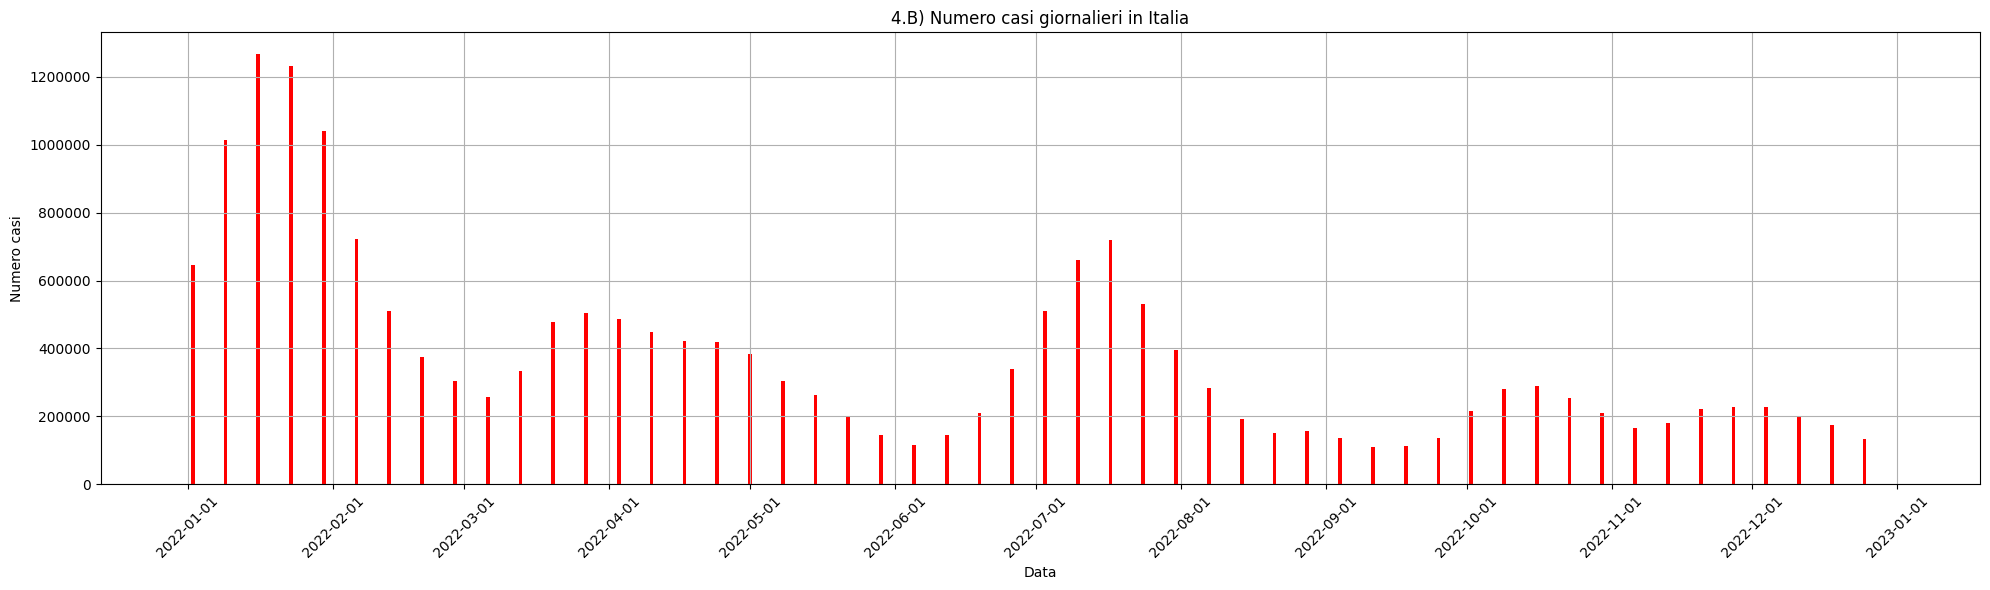

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(italy_2022['date'], italy_2022['new_cases'], color='red', linestyle='-')
# Get the current axes (ax) from the barplot
plt.title('4.B) Numero casi giornalieri in Italia')
plt.xlabel('Data')
plt.ylabel('Numero casi')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Apply the custom formatter to the y-axis
plt.ticklabel_format(style='plain', axis='y')
# Set x-axis date format and increase detail
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

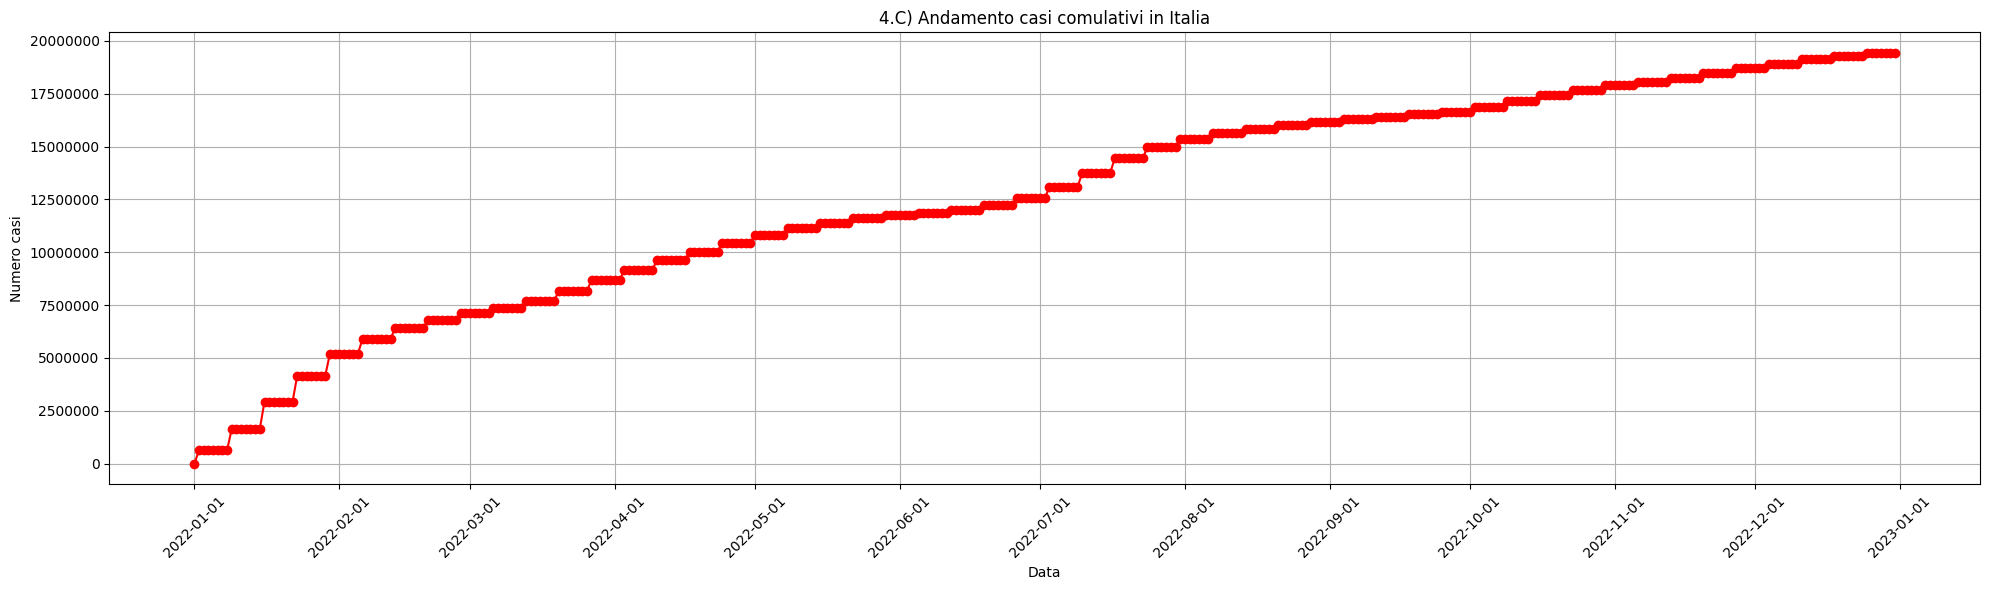

In [ ]:
italy_2022['cumulative_new_cases'] = italy_2022['new_cases'].cumsum()

plt.figure(figsize=(20, 6))
plt.plot(italy_2022['date'], italy_2022['cumulative_new_cases'], color='red', marker='o', linestyle='-')
# Get the current axes (ax) from the barplot
plt.title('4.C) Andamento casi comulativi in Italia')
plt.xlabel('Data')
plt.ylabel('Numero casi')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Apply the custom formatter to the y-axis
plt.ticklabel_format(style='plain', axis='y')
# Set x-axis date format and increase detail
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

#### **5.A)** Riguardo le nazioni di `Italia, Germania e Francia`, mostrare in un `boxplot` la differenza tra queste nazioni riguardo il numero di `pazienti in terapia intensiva` (Intensive Care Unit, ICU) da `maggio 2022` (incluso) ad `aprile 2023` (incluso), scrivere un breve commento a riguardo;

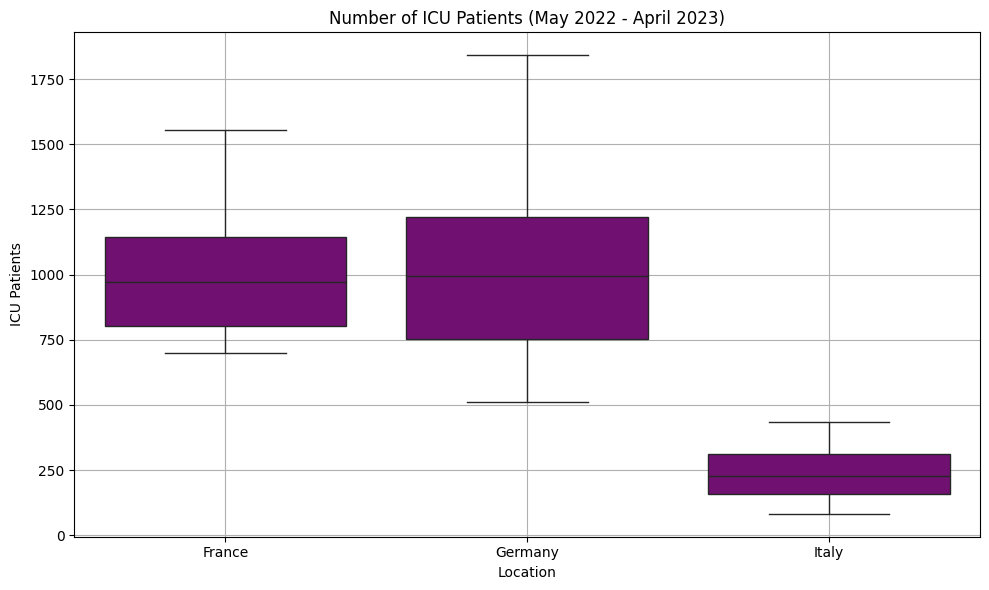

In [ ]:
countries = ['Italy', 'Germany', 'France']
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-04-30')

ita_ger_fra = covidDF[(covidDF['location'].isin(countries)) & ((covidDF['date'] >= start_date) & (covidDF['date'] <= end_date))]

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=ita_ger_fra, color='purple')
plt.title('Number of ICU Patients (May 2022 - April 2023)')
plt.xlabel('Location')
plt.ylabel('ICU Patients')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analsisi ICU Patients

Come si puà vedere dal grafico l'Italia ha riportato numeri molto più bassi di pazienti in terapia intensiva rispetto a Germania e Francia.
Il Governo tramite i vari lockdown è riuscito nell'intento di abbassare il tasso di contagio, di conseguenza il numero di casi in terapie intensive.
L'Italia è riuscita così ad uscire prima dal circolo vizioso chaimato Covid-19.

#### **6.A)** Riguardo le nazioni di `Italia, Germania e Francia` nel `2023`, mostrare la `somma dei pazienti` ospitalizzati per ognuna -- se ci sono dati nulli, suggerire se può essere possbile gestirli tramite sostituzione o meno

In [ ]:
countries = ['Italy', 'Germany', 'France']

ita_ger_fra = covidDF[(covidDF['location'].isin(countries)) & (covidDF['date'].dt.year ==2023)]

ita_ger_fra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 117628 to 167098
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1095 non-null   object        
 1   continent                                   1095 non-null   object        
 2   location                                    1095 non-null   object        
 3   date                                        1095 non-null   datetime64[ns]
 4   total_cases                                 1095 non-null   float64       
 5   new_cases                                   737 non-null    float64       
 6   new_cases_smoothed                          737 non-null    float64       
 7   total_deaths                                1095 non-null   float64       
 8   new_deaths                                  737 non-null    float64       
 9   new_de